## Network with multi-period battery dispatch


**Install PyPSA and PYPOWER**

In [1]:
pip install pypsa

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pypower

Note: you may need to restart the kernel to use updated packages.


**Load IEEE 14-Bus Network**

In [4]:
import pypsa
import numpy as np
from pypower.api import case14

ppc = case14()
n = pypsa.Network()
n.import_from_pypower_ppc(ppc)

# Ensure we have at least one snapshot
if len(n.snapshots) == 0:
    n.set_snapshots([0])

# Run non-linear AC power flow
n.pf()

INFO:pypsa.network.power_flow:Performing non-linear load-flow on AC sub-network <pypsa.networks.SubNetwork object at 0x713cf2a89f40> for snapshots Index(['now'], dtype='object', name='snapshot')


{'n_iter': name      0
 snapshot   
 now       4,
 'error': name                 0
 snapshot              
 now       6.235013e-13,
 'converged': name         0
 snapshot      
 now       True}

***Check results in PyPSA***

Bus voltage

In [5]:
# Voltage magnitudes in p.u. (index 0 = snapshot 0)
print("Bus voltage magnitudes (p.u.):")
print(n.buses_t.v_mag_pu.iloc[0])

print("\nBus voltage angles (rad):")
print(n.buses_t.v_ang.iloc[0])


Bus voltage magnitudes (p.u.):
name
1     1.060000
2     1.045000
3     1.010000
4     1.017671
5     1.019514
6     1.070000
7     1.061520
8     1.090000
9     1.055932
10    1.050985
11    1.056907
12    1.055189
13    1.050382
14    1.035530
Name: now, dtype: float64

Bus voltage angles (rad):
name
1     0.000000
2    -0.086963
3    -0.222095
4    -0.179994
5    -0.153133
6    -0.248202
7    -0.233169
8    -0.233169
9    -0.260726
10   -0.263497
11   -0.258145
12   -0.263119
13   -0.264527
14   -0.279840
Name: now, dtype: float64


Generator Output

In [6]:
print("\nGenerator active power (MW):")
print(n.generators_t.p.iloc[0])

print("\nGenerator reactive power (MVAr):")
print(n.generators_t.q.iloc[0])



Generator active power (MW):
name
G0    232.393272
G1     40.000000
G2      0.000000
G3      0.000000
G4      0.000000
Name: now, dtype: float64

Generator reactive power (MVAr):
name
G0   -16.549301
G1    43.557100
G2    25.075348
G3    12.730944
G4    17.623451
Name: now, dtype: float64


Line Flows

In [7]:
print("\nLine active power p0 (MW):")
print(n.lines_t.p0.iloc[0])

print("\nLine reactive power q0 (MVAr):")
print(n.lines_t.q0.iloc[0])



Line active power p0 (MW):
name
L0     1.568829e+02
L1     7.551038e+01
L2     7.323758e+01
L3     5.613150e+01
L4     4.151622e+01
L5    -2.328569e+01
L6    -6.115823e+01
L7     7.353277e+00
L8     7.786067e+00
L9     1.774798e+01
L10   -4.666581e-14
L11    2.807418e+01
L12    5.227552e+00
L13    9.426381e+00
L14   -3.785322e+00
L15    1.614258e+00
L16    5.643851e+00
Name: now, dtype: float64

Line reactive power q0 (MVAr):
name
L0    -20.404292
L1      3.854991
L2      3.560203
L3     -1.550350
L4      1.170998
L5      4.473116
L6     15.823642
L7      3.560473
L8      2.503414
L9      7.216575
L10   -17.162971
L11     5.778691
L12     4.219138
L13     3.610006
L14    -1.615063
L15     0.753959
L16     1.747174
Name: now, dtype: float64


***Output from PYPOWER - Double Check***

In [8]:
from pypower.api import case14, runpf, ppoption

ppc = case14()

# Create options: VERBOSE=0 (no text), OUT_ALL=0 (no final report)
ppopt = ppoption(VERBOSE=0, OUT_ALL=0)

ppc_res, success = runpf(ppc, ppopt)
print("PYPOWER success:", success)

bus_res = ppc_res["bus"]
gen_res = ppc_res["gen"]

# PYPOWER bus voltages:
v_mag_pp = bus_res[:, 7]   # Vm (p.u.)
v_ang_pp = bus_res[:, 8]   # Va (deg)

print("\nPYPOWER Vm (p.u.):")
print(v_mag_pp)
print("\nPYPOWER Va (deg):")
print(v_ang_pp)


PYPOWER success: 1

PYPOWER Vm (p.u.):
[1.06       1.045      1.01       1.01767085 1.01951386 1.07
 1.06151953 1.09       1.05593172 1.05098463 1.05690652 1.05518856
 1.05038171 1.03552995]

PYPOWER Va (deg):
[  0.          -4.98258914 -12.72509994 -10.31290109  -8.7738539
 -14.22094646 -13.35962737 -13.35962737 -14.9385213  -15.09728846
 -14.79062203 -15.07558452 -15.15627634 -16.03364453]


***Check Results***

In [9]:
print("PyPSA bus voltage magnitudes (p.u.):")
print(n.buses_t.v_mag_pu.iloc[0])

print("\nPyPSA bus voltage angles (rad):")
print(n.buses_t.v_ang.iloc[0])


PyPSA bus voltage magnitudes (p.u.):
name
1     1.060000
2     1.045000
3     1.010000
4     1.017671
5     1.019514
6     1.070000
7     1.061520
8     1.090000
9     1.055932
10    1.050985
11    1.056907
12    1.055189
13    1.050382
14    1.035530
Name: now, dtype: float64

PyPSA bus voltage angles (rad):
name
1     0.000000
2    -0.086963
3    -0.222095
4    -0.179994
5    -0.153133
6    -0.248202
7    -0.233169
8    -0.233169
9    -0.260726
10   -0.263497
11   -0.258145
12   -0.263119
13   -0.264527
14   -0.279840
Name: now, dtype: float64


***Compare PyPSA and PYPOWER***

In [10]:
# Make sure PYPOWER results are computed as in step 1
from pypower.api import runpf, ppoption

ppopt = ppoption(VERBOSE=0, OUT_ALL=0)
ppc_res, success = runpf(ppc, ppopt)

bus_res = ppc_res["bus"]
v_mag_pp = bus_res[:, 7]   # Vm p.u.
v_ang_pp = bus_res[:, 8]   # Va deg

# PyPSA results
v_mag_psa = n.buses_t.v_mag_pu.iloc[0].values
v_ang_psa = np.degrees(n.buses_t.v_ang.iloc[0].values)   # rad → deg

print("\nMax |ΔVm|:", np.max(np.abs(v_mag_psa - v_mag_pp)))
print("Max |ΔVa| (deg):", np.max(np.abs(v_ang_psa - v_ang_pp)))



Max |ΔVm|: 5.4791726711300726e-12
Max |ΔVa| (deg): 2.6198954117262474e-10


***Check all the data***

In [11]:
print(n.buses.head())
print(n.lines.head())
print(n.generators[["bus", "p_nom", "p_set"]])
print(n.loads[["bus", "p_set", "q_set"]])


      v_nom type    x    y carrier unit location  v_mag_pu_set  v_mag_pu_min  \
name                                                                           
1       1.0       0.0  0.0      AC                       1.060          0.94   
2       1.0       0.0  0.0      AC                       1.045          0.94   
3       1.0       0.0  0.0      AC                       1.010          0.94   
4       1.0       0.0  0.0      AC                       1.019          0.94   
5       1.0       0.0  0.0      AC                       1.020          0.94   

      v_mag_pu_max control generator sub_network    Pd    Qd   Gs   Bs  area  \
name                                                                           
1             1.06   Slack        G0           0   0.0   0.0  0.0  0.0   1.0   
2             1.06      PV        G1           0  21.7  12.7  0.0  0.0   1.0   
3             1.06      PV        G2           0  94.2  19.0  0.0  0.0   1.0   
4             1.06      PQ             

In [12]:
n.statistics()


,,Optimal Capacity,Installed Capacity,Supply,Withdrawal,Energy Balance,Transmission,Capacity Factor,Curtailment,Capital Expenditure,Operational Expenditure,Revenue,Market Value
Generator,-,0.0,772.4,272.39327,0.00000,272.39327,0.00000,NaN,0.0,0.0,0.0,0.0,NaN
Line,AC,0.0,168300.0,88.22924,486.15210,-397.92286,397.92286,NaN,0.0,0.0,0.0,0.0,NaN
Load,-,0.0,0.0,0.00000,259.00000,-259.00000,0.00000,NaN,0.0,0.0,0.0,0.0,0.0
Transformer,-,0.0,29700.0,0.00000,88.24125,-88.24125,88.24125,NaN,0.0,0.0,0.0,0.0,0.0


***Tag the Users in PyPSA***

In [13]:
import pandas as pd

# Make sure there's a column to store the user label
if "prosumer_id" not in n.loads.columns:
    n.loads["prosumer_id"] = ""

# Map buses to user labels
prosumer_buses = {
    4: "User 1",
    5: "User 2",
    9: "User 3",
    10: "User 4",
    11: "User 5",
    14: "User 6",
}

# In PyPSA, bus names may be integers (4,5,...) or strings ("4","Bus 4")
# We'll map by index position robustly:
bus_index_map = {int(b.split()[0]) if isinstance(b, str) else int(b): b
                 for b in n.buses.index}

for bus_num, user_label in prosumer_buses.items():
    bus_name = bus_index_map[bus_num]
    # Tag all loads connected to that bus as this prosumer
    mask = n.loads["bus"] == bus_name
    n.loads.loc[mask, "prosumer_id"] = user_label

# Check
print(n.loads[["bus", "p_set", "q_set", "prosumer_id"]])


     bus  p_set  q_set prosumer_id
name                              
L0     2   21.7   12.7            
L1     3   94.2   19.0            
L2     4   47.8   -3.9      User 1
L3     5    7.6    1.6      User 2
L4     6   11.2    7.5            
L5     9   29.5   16.6      User 3
L6    10    9.0    5.8      User 4
L7    11    3.5    1.8      User 5
L8    12    6.1    1.6            
L9    13   13.5    5.8            
L10   14   14.9    5.0      User 6


In [14]:
# Simple example PV capacity for each user (MW)
prosumer_pv_nom = {
    "User 1": 2.0,
    "User 2": 3.0,
    "User 3": 1.0,
    "User 4": 1.0,
    "User 5": 2.5,
    "User 6": 1.5,
}

for bus_num, user_label in prosumer_buses.items():
    bus_name = bus_index_map[bus_num]
    p_nom = prosumer_pv_nom[user_label]

    n.add(
        "Generator",
        name=f"{user_label} PV",
        bus=bus_name,
        p_nom=p_nom,
        p_max_pu=1.0,       # can generate up to p_nom at this snapshot
        marginal_cost=0.0   # cheap renewable energy
    )

# Check new generators
print(n.generators[["bus", "p_nom", "marginal_cost"]])


          bus  p_nom  marginal_cost
name                               
G0          1  332.4            0.0
G1          2  140.0            0.0
G2          3  100.0            0.0
G3          6  100.0            0.0
G4          8  100.0            0.0
User 1 PV   4    2.0            0.0
User 2 PV   5    3.0            0.0
User 3 PV   9    1.0            0.0
User 4 PV  10    1.0            0.0
User 5 PV  11    2.5            0.0
User 6 PV  14    1.5            0.0


***Change Snapshot to 24 hours - DAM***

In [15]:
# 24 hourly snapshots for a single day
snapshots = pd.date_range("2025-01-01 00:00", "2025-01-01 23:00", freq="1h")

n.set_snapshots(snapshots)

# (Optional) check
print(n.snapshots)

# Make sure there is a quadratic cost column
if "marginal_cost_quadratic" not in n.generators.columns:
    n.generators["marginal_cost_quadratic"] = 0.0

# Identify thermal generators vs PV (assuming your PV names contain "PV")
thermal_mask = ~n.generators.index.str.contains("PV")
pv_mask = n.generators.index.str.contains("PV")

# Assign marginal costs (€/MWh) to thermal generators
# You can tune these as you like
thermal_costs = [10, 15, 25, 40, 60]  # example for up to 5 gens

# Broadcast over however many thermal gens you actually have
n.generators.loc[thermal_mask, "marginal_cost"] = thermal_costs[:thermal_mask.sum()]

# Optional: add a small quadratic cost (€/MWh²) to penalise very high output
n.generators.loc[thermal_mask, "marginal_cost_quadratic"] = 0.01

print(n.generators[["bus", "p_nom", "marginal_cost", "marginal_cost_quadratic"]])

n.generators.loc[pv_mask, "marginal_cost"] = 0.0
n.generators.loc[pv_mask, "marginal_cost_quadratic"] = 0.0


DatetimeIndex(['2025-01-01 00:00:00', '2025-01-01 01:00:00',
               '2025-01-01 02:00:00', '2025-01-01 03:00:00',
               '2025-01-01 04:00:00', '2025-01-01 05:00:00',
               '2025-01-01 06:00:00', '2025-01-01 07:00:00',
               '2025-01-01 08:00:00', '2025-01-01 09:00:00',
               '2025-01-01 10:00:00', '2025-01-01 11:00:00',
               '2025-01-01 12:00:00', '2025-01-01 13:00:00',
               '2025-01-01 14:00:00', '2025-01-01 15:00:00',
               '2025-01-01 16:00:00', '2025-01-01 17:00:00',
               '2025-01-01 18:00:00', '2025-01-01 19:00:00',
               '2025-01-01 20:00:00', '2025-01-01 21:00:00',
               '2025-01-01 22:00:00', '2025-01-01 23:00:00'],
              dtype='datetime64[ns]', name='snapshot', freq='h')
          bus  p_nom  marginal_cost  marginal_cost_quadratic
name                                                        
G0          1  332.4           10.0                     0.01
G1          2  140.

***Add some batteries***

In [16]:
prosumer_buses = {
    4: "User 1",
    5: "User 2",
    9: "User 3",
    10: "User 4",
    11: "User 5",
    14: "User 6",
}

# Rebuild bus_index_map (same idea as before)
bus_index_map = {int(b.split()[0]) if isinstance(b, str) else int(b): b
                 for b in n.buses.index}

# Example battery specs for Users 1–3
battery_specs = {
    "User 1": {"p_nom": 2.0, "max_hours": 4, "mc": 1.0},
    "User 2": {"p_nom": 1.5, "max_hours": 3, "mc": 1.0},
    "User 3": {"p_nom": 1.0, "max_hours": 2, "mc": 0.5},
}

for bus_num, user_label in prosumer_buses.items():
    if user_label not in battery_specs:
        continue

    bus_name = bus_index_map[bus_num]
    specs = battery_specs[user_label]

    n.add(
        "StorageUnit",
        name=f"{user_label} Battery",
        bus=bus_name,
        p_nom=specs["p_nom"],        # max charge/discharge power (MW)
        max_hours=specs["max_hours"],# energy capacity = p_nom * max_hours (MWh)
        efficiency_store=0.95,
        efficiency_dispatch=0.95,
        cyclic_state_of_charge=True, # day wraps around if you want
        marginal_cost=specs["mc"],   # €/MWh on discharge
    )

# Check storage units
print(n.storage_units[["bus", "p_nom", "max_hours", "marginal_cost"]])

if "marginal_cost_quadratic" not in n.storage_units.columns:
    n.storage_units["marginal_cost_quadratic"] = 0.0

n.storage_units["marginal_cost_quadratic"] = 0.0  # or something small if desired


               bus  p_nom  max_hours  marginal_cost
name                                               
User 1 Battery   4    2.0        4.0            1.0
User 2 Battery   5    1.5        3.0            1.0
User 3 Battery   9    1.0        2.0            0.5


***Set up PV Profile***

In [17]:
import numpy as np
import pandas as pd

# Identify PV generators by name pattern (your User X PV units)
pv_gens = n.generators.index[n.generators.index.str.contains("PV")]

hours = n.snapshots.hour.values

# Simple smooth PV profile: zero at night, peak ~ noon
# This is just a toy example; you can always replace with real data.
pv_profile = np.maximum(0, np.sin((hours - 6) / 12 * np.pi))
# Now pv_profile is length-24 between 0 and 1

# Create full p_max_pu DataFrame for all generators
n.generators_t.p_max_pu = pd.DataFrame(
    1.0, index=n.snapshots, columns=n.generators.index
)

# Apply PV availability to PV generators
for g in pv_gens:
    n.generators_t.p_max_pu[g] = pv_profile

# Quick sanity check
print("PV profile (0–1) over 24h:")
print(pd.Series(pv_profile, index=n.snapshots))


PV profile (0–1) over 24h:
snapshot
2025-01-01 00:00:00    0.000000e+00
2025-01-01 01:00:00    0.000000e+00
2025-01-01 02:00:00    0.000000e+00
2025-01-01 03:00:00    0.000000e+00
2025-01-01 04:00:00    0.000000e+00
2025-01-01 05:00:00    0.000000e+00
2025-01-01 06:00:00    0.000000e+00
2025-01-01 07:00:00    2.588190e-01
2025-01-01 08:00:00    5.000000e-01
2025-01-01 09:00:00    7.071068e-01
2025-01-01 10:00:00    8.660254e-01
2025-01-01 11:00:00    9.659258e-01
2025-01-01 12:00:00    1.000000e+00
2025-01-01 13:00:00    9.659258e-01
2025-01-01 14:00:00    8.660254e-01
2025-01-01 15:00:00    7.071068e-01
2025-01-01 16:00:00    5.000000e-01
2025-01-01 17:00:00    2.588190e-01
2025-01-01 18:00:00    1.224647e-16
2025-01-01 19:00:00    0.000000e+00
2025-01-01 20:00:00    0.000000e+00
2025-01-01 21:00:00    0.000000e+00
2025-01-01 22:00:00    0.000000e+00
2025-01-01 23:00:00    0.000000e+00
Freq: h, dtype: float64


***Set up Time-Varying Load Profile***

In [18]:
# Normalized daily load profile (very simple toy shape)
load_profile = np.array([
    0.70, 0.68, 0.66, 0.65, 0.65, 0.70,  # 00–05
    0.80, 0.90, 0.95, 1.00, 1.05, 1.10,  # 06–11
    1.10, 1.15, 1.20, 1.15, 1.10, 1.05,  # 12–17
    1.00, 0.95, 0.90, 0.85, 0.80, 0.75   # 18–23
])

load_profile_series = pd.Series(load_profile, index=n.snapshots)

# Create time-varying p_set for loads
n.loads_t.p_set = pd.DataFrame(index=n.snapshots, columns=n.loads.index)

for load_name, row in n.loads.iterrows():
    base_p = row["p_set"]  # MW from the static IEEE-14 data
    n.loads_t.p_set[load_name] = base_p * load_profile_series

# (Optional) keep reactive power proportional to P, or leave constant
# Here: make q_set follow the same shape if you care about it
if "q_set" in n.loads.columns:
    n.loads_t.q_set = pd.DataFrame(index=n.snapshots, columns=n.loads.index)
    for load_name, row in n.loads.iterrows():
        base_q = row["q_set"]
        n.loads_t.q_set[load_name] = base_q * load_profile_series

# Sanity check: first few hours of total load
print("Total active load each hour (MW):")
print(n.loads_t.p_set.sum(axis=1).head())


Total active load each hour (MW):
snapshot
2025-01-01 00:00:00    181.30
2025-01-01 01:00:00    176.12
2025-01-01 02:00:00    170.94
2025-01-01 03:00:00    168.35
2025-01-01 04:00:00    168.35
Freq: h, dtype: float64


***Run the Simulation***

In [19]:
status, condition = n.optimize(solver_name="highs", log_to_console=False)
print(status, condition)


Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14'],
      dtype='object', name='name')
Index(['L0', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'L10',
       'L11', 'L12', 'L13', 'L14', 'L15', 'L16'],
      dtype='object', name='name')
Index(['L10', 'L11'], dtype='object', name='name')
Index(['T0', 'T1', 'T2'], dtype='object', name='name')
Index(['0'], dtype='object', name='name')
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - log_to_console: False
INFO:linopy.io: Writing time: 0.06s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 960 primals, 2496 duals
Objective: 6.91e+04
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Line-fix-s-lower, Line-fix-s-upper, Transformer-fix-s-lower, Transformer-fix-s-upper, StorageUnit-fix-p_dispatc

ok optimal


In [20]:
# Nodal marginal prices (€/MWh) at each bus and hour
prices = n.buses_t.marginal_price
print(prices.head())

# Generator dispatch (MW)
gen_dispatch = n.generators_t.p
print(gen_dispatch.head())

# Storage behavior (if you added batteries)
if not n.storage_units.empty:
    print("Battery dispatch (MW):")
    print(n.storage_units_t.p.head())
    print("Battery state of charge (MWh):")
    print(n.storage_units_t.state_of_charge.head())


name                         1          2          3          4          5  \
snapshot                                                                     
2025-01-01 00:00:00  13.626018  13.626030  13.626035  13.626033  13.626029   
2025-01-01 01:00:00  13.522418  13.522429  13.522434  13.522432  13.522428   
2025-01-01 02:00:00  13.420922  13.420933  13.420938  13.420936  13.420932   
2025-01-01 03:00:00  13.387017  13.387028  13.387032  13.387031  13.387027   
2025-01-01 04:00:00  13.387017  13.387028  13.387032  13.387031  13.387027   

name                         6          7          8          9         10  \
snapshot                                                                     
2025-01-01 00:00:00  13.626033  13.626034  13.626034  13.626035  13.626035   
2025-01-01 01:00:00  13.522432  13.522433  13.522433  13.522434  13.522434   
2025-01-01 02:00:00  13.420936  13.420937  13.420937  13.420938  13.420938   
2025-01-01 03:00:00  13.387031  13.387031  13.387031  13.387033

***Extract price signals for your 6 prosumers***

In [21]:
prosumer_buses = {
    4: "User 1",
    5: "User 2",
    9: "User 3",
    10: "User 4",
    11: "User 5",
    14: "User 6",
}

# Rebuild bus_index_map in case it's not in scope
bus_index_map = {
    (int(b.split()[0]) if isinstance(b, str) else int(b)): b
    for b in n.buses.index
}

for bus_num, user_label in prosumer_buses.items():
    bus_name = bus_index_map[bus_num]
    user_prices = prices[bus_name]

    print(f"\n{user_label} (bus {bus_num}) price series (€/MWh):")
    print(user_prices)


User 1 (bus 4) price series (€/MWh):
snapshot
2025-01-01 00:00:00    13.626033
2025-01-01 01:00:00    13.522432
2025-01-01 02:00:00    13.420936
2025-01-01 03:00:00    13.387031
2025-01-01 04:00:00    13.387031
2025-01-01 05:00:00    13.626033
2025-01-01 06:00:00    14.144038
2025-01-01 07:00:00    14.605102
2025-01-01 08:00:00    14.811044
2025-01-01 09:00:00    15.012243
2025-01-01 10:00:00    15.124263
2025-01-01 11:00:00    15.242775
2025-01-01 12:00:00    15.239027
2025-01-01 13:00:00    15.372276
2025-01-01 14:00:00    15.502767
2025-01-01 15:00:00    15.391747
2025-01-01 16:00:00    15.294028
2025-01-01 17:00:00    15.191057
2025-01-01 18:00:00    15.090026
2025-01-01 19:00:00    14.921045
2025-01-01 20:00:00    14.662042
2025-01-01 21:00:00    14.403040
2025-01-01 22:00:00    14.144038
2025-01-01 23:00:00    13.885035
Freq: h, Name: 4, dtype: float64

User 2 (bus 5) price series (€/MWh):
snapshot
2025-01-01 00:00:00    13.626029
2025-01-01 01:00:00    13.522428
2025-01-01 02:0

***Check Prosumer Net Injection***

In [22]:
# Example: net generation - load at each prosumer bus (rough idea)
for bus_num, user_label in prosumer_buses.items():
    bus_name = bus_index_map[bus_num]

    gens_at_bus = n.generators.index[n.generators["bus"] == bus_name]
    loads_at_bus = n.loads.index[n.loads["bus"] == bus_name]

    p_gen = n.generators_t.p[gens_at_bus].sum(axis=1) if len(gens_at_bus) > 0 else 0.0
    p_load = n.loads_t.p_set[loads_at_bus].sum(axis=1) if len(loads_at_bus) > 0 else 0.0

    net_injection = p_gen - p_load

    print(f"\nNet injection for {user_label} (MW) over 24h:")
    print(net_injection)



Net injection for User 1 (MW) over 24h:
snapshot
2025-01-01 00:00:00   -33.460000
2025-01-01 01:00:00   -32.504000
2025-01-01 02:00:00   -31.548000
2025-01-01 03:00:00   -31.070000
2025-01-01 04:00:00   -31.070000
2025-01-01 05:00:00   -33.460000
2025-01-01 06:00:00   -38.240000
2025-01-01 07:00:00   -42.502362
2025-01-01 08:00:00   -44.410000
2025-01-01 09:00:00   -46.385786
2025-01-01 10:00:00   -48.457949
2025-01-01 11:00:00   -50.648148
2025-01-01 12:00:00   -50.580000
2025-01-01 13:00:00   -53.038148
2025-01-01 14:00:00   -55.627949
2025-01-01 15:00:00   -53.555786
2025-01-01 16:00:00   -51.580000
2025-01-01 17:00:00   -49.672362
2025-01-01 18:00:00   -47.800000
2025-01-01 19:00:00   -45.410000
2025-01-01 20:00:00   -43.020000
2025-01-01 21:00:00   -40.630000
2025-01-01 22:00:00   -38.240000
2025-01-01 23:00:00   -35.850000
Freq: h, dtype: float64

Net injection for User 2 (MW) over 24h:
snapshot
2025-01-01 00:00:00   -5.320000
2025-01-01 01:00:00   -5.168000
2025-01-01 02:00:00 

***Sanity check for PV capacity and load***

In [23]:
# Compare each user's load vs PV generator size
for bus_num, user_label in prosumer_buses.items():
    bus_name = bus_index_map[bus_num]
    gens_at_bus = n.generators.index[n.generators["bus"] == bus_name]
    loads_at_bus = n.loads.index[n.loads["bus"] == bus_name]

    total_load = n.loads.loc[loads_at_bus, "p_set"].sum()
    total_gen = n.generators.loc[gens_at_bus, "p_nom"].sum()
    print(f"{user_label}: load ~{total_load:.2f} MW, PV ~{total_gen:.2f} MW")


User 1: load ~47.80 MW, PV ~2.00 MW
User 2: load ~7.60 MW, PV ~3.00 MW
User 3: load ~29.50 MW, PV ~1.00 MW
User 4: load ~9.00 MW, PV ~1.00 MW
User 5: load ~3.50 MW, PV ~2.50 MW
User 6: load ~14.90 MW, PV ~1.50 MW


***Scenario 2 - Increase PV + Battery Capacity to smooth out Load***

In [24]:
import numpy as np
import pandas as pd

##############################################
# SCENARIO 1 (already built) → save a copy
##############################################

# n is your existing PyPSA network (Scenario 1)
# with IEEE-14 imported, marginal costs set, prosumer PVs added, etc.
# We keep it as-is and copy for Scenario 2.

# detach the solver model before copying
n.model.solver_model = None

n_s1 = n.copy()  # keep Scenario 1 for later comparison

##############################################
# SCENARIO 2: create modified network
##############################################

# Work on a separate copy so Scenario 1 remains untouched
n_s2 = n_s1.copy()

##############################################
# 1. Define 24h snapshots (1 hour resolution)
##############################################

snapshots = pd.date_range("2025-01-01 00:00", "2025-01-01 23:00", freq="1h")
n_s2.set_snapshots(snapshots)

##############################################
# 2. Define prosumer buses and mapping
##############################################

prosumer_buses = {
    4: "User 1",
    5: "User 2",
    9: "User 3",
    10: "User 4",
    11: "User 5",
    14: "User 6",
}

# Map integer bus numbers → actual bus names in the network
bus_index_map = {
    (int(b.split()[0]) if isinstance(b, str) else int(b)): b
    for b in n_s2.buses.index
}

##############################################
# 3. Time-varying PV and load profiles
##############################################

hours = n_s2.snapshots.hour.values

# PV availability profile between 0 and 1 (peak around noon)
pv_profile = np.maximum(0, np.sin((hours - 6) / 12 * np.pi))

# Normalized daily load profile
load_profile = np.array([
    0.70, 0.68, 0.66, 0.65, 0.65, 0.70,  # 00–05
    0.80, 0.90, 0.95, 1.00, 1.05, 1.10,  # 06–11
    1.10, 1.15, 1.20, 1.15, 1.10, 1.05,  # 12–17
    1.00, 0.95, 0.90, 0.85, 0.80, 0.75   # 18–23
])
load_profile_series = pd.Series(load_profile, index=n_s2.snapshots)

##############################################
# 3a. Rebuild generator p_max_pu (PV vs others)
##############################################

# Start with all generators fully available (1.0)
n_s2.generators_t.p_max_pu = pd.DataFrame(
    1.0, index=n_s2.snapshots, columns=n_s2.generators.index
)

pv_mask = n_s2.generators.index.str.contains("PV")
for g in n_s2.generators.index[pv_mask]:
    n_s2.generators_t.p_max_pu[g] = pv_profile

##############################################
# 3b. Rebuild time-varying loads from base p_set
##############################################

# Active power (P)
n_s2.loads_t.p_set = pd.DataFrame(index=n_s2.snapshots, columns=n_s2.loads.index)
for load_name, row in n_s2.loads.iterrows():
    base_p = row["p_set"]  # static MW from IEEE-14
    n_s2.loads_t.p_set[load_name] = base_p * load_profile_series

# Reactive power (Q) – proportional to P with same shape (optional)
if "q_set" in n_s2.loads.columns:
    n_s2.loads_t.q_set = pd.DataFrame(index=n_s2.snapshots, columns=n_s2.loads.index)
    for load_name, row in n_s2.loads.iterrows():
        base_q = row["q_set"]
        n_s2.loads_t.q_set[load_name] = base_q * load_profile_series

##############################################
# 4. Rescale PV capacities so prosumers can export at midday
##############################################

# Find PV peak hour index and load factor at that time
peak_idx = int(np.argmax(pv_profile))
load_factor_at_peak = load_profile[peak_idx]
self_suff_ratio = 2.0  # target: PV ≈ 200% of load at PV peak

print("Scenario 2 – PV peak hour:", n_s2.snapshots[peak_idx])
print("Scenario 2 – Load factor at PV peak:", load_factor_at_peak)

for bus_num, user_label in prosumer_buses.items():
    bus_name = bus_index_map[bus_num]

    # All loads at this bus
    loads_at_bus = n_s2.loads.index[n_s2.loads["bus"] == bus_name]
    base_load = n_s2.loads.loc[loads_at_bus, "p_set"].sum()  # MW from static data

    # Target PV capacity at this bus
    target_pv_nom = self_suff_ratio * base_load * load_factor_at_peak

    # PV generators at this bus
    pv_at_bus = n_s2.generators.index[
        (n_s2.generators["bus"] == bus_name) & (n_s2.generators.index.str.contains("PV"))
    ]

    if len(pv_at_bus) == 0:
        print(f"{user_label}: no PV generators found at bus {bus_name}, skipping PV resize.")
        continue

    share = target_pv_nom / len(pv_at_bus)
    n_s2.generators.loc[pv_at_bus, "p_nom"] = share

    print(f"{user_label}: base_load ≈ {base_load:.2f} MW → PV p_nom ≈ {target_pv_nom:.2f} MW")

##############################################
# 5. (Re)define batteries for each prosumer
##############################################

# Optional: clear previous storage units in Scenario 2 for a clean setup
n_s2.storage_units.drop(n_s2.storage_units.index, inplace=True)

for bus_num, user_label in prosumer_buses.items():
    bus_name = bus_index_map[bus_num]

    loads_at_bus = n_s2.loads.index[n_s2.loads["bus"] == bus_name]
    base_load = n_s2.loads.loc[loads_at_bus, "p_set"].sum()

    if base_load <= 0:
        continue

    p_nom_batt = 0.5 * base_load   # MW
    max_hours = 3                  # MWh = p_nom_batt * max_hours

    n_s2.add(
        "StorageUnit",
        name=f"{user_label} Battery",
        bus=bus_name,
        p_nom=p_nom_batt,
        max_hours=max_hours,
        efficiency_store=0.95,
        efficiency_dispatch=0.95,
        cyclic_state_of_charge=True,
        marginal_cost=1.0,         # €/MWh on discharge
    )

print("\nScenario 2 – storage units:")
print(n_s2.storage_units[["bus", "p_nom", "max_hours", "marginal_cost"]])

##############################################
# 6. (Optional) Clean up carriers & zero resistances
##############################################

# Add generic AC carrier if missing
if "AC" not in n_s2.carriers.index:
    n_s2.add("Carrier", "AC")

n_s2.buses["carrier"] = "AC"
n_s2.lines["carrier"] = "AC"
if not n_s2.transformers.empty:
    n_s2.transformers["carrier"] = "AC"

# Avoid exactly zero r on lines/transformers (small regularization)
zero_r_lines = n_s2.lines.index[n_s2.lines["r"] == 0]
n_s2.lines.loc[zero_r_lines, "r"] = 1e-4

if not n_s2.transformers.empty:
    zero_r_trafos = n_s2.transformers.index[n_s2.transformers["r"] == 0]
    n_s2.transformers.loc[zero_r_trafos, "r"] = 1e-4

##############################################
# 7. Run 24h OPF for Scenario 2
##############################################

status2, condition2 = n_s2.optimize(solver_name="highs", log_to_console=False)
print("\nScenario 2 – optimization status:", status2, condition2)

##############################################
# 8. Extract price signals and net injections
##############################################

prices_s2 = n_s2.buses_t.marginal_price

for bus_num, user_label in prosumer_buses.items():
    bus_name = bus_index_map[bus_num]

    gens_at_bus = n_s2.generators.index[n_s2.generators["bus"] == bus_name]
    loads_at_bus = n_s2.loads.index[n_s2.loads["bus"] == bus_name]
    stor_at_bus = n_s2.storage_units.index[n_s2.storage_units["bus"] == bus_name]

    p_gen = n_s2.generators_t.p[gens_at_bus].sum(axis=1) if len(gens_at_bus) > 0 else 0.0
    p_load = n_s2.loads_t.p_set[loads_at_bus].sum(axis=1) if len(loads_at_bus) > 0 else 0.0
    p_stor = n_s2.storage_units_t.p[stor_at_bus].sum(axis=1) if len(stor_at_bus) > 0 else 0.0

    net_injection = p_gen + p_stor - p_load  # >0 export, <0 import
    user_prices = prices_s2[bus_name]

    print(f"\n=== Scenario 2 – {user_label} (bus {bus_num}) ===")
    print("Net injection (MW) over 24h:")
    print(net_injection)
    print("\nPrice (€/MWh) over 24h:")
    print(user_prices)


Scenario 2 – PV peak hour: 2025-01-01 12:00:00
Scenario 2 – Load factor at PV peak: 1.1
User 1: base_load ≈ 47.80 MW → PV p_nom ≈ 105.16 MW
User 2: base_load ≈ 7.60 MW → PV p_nom ≈ 16.72 MW
User 3: base_load ≈ 29.50 MW → PV p_nom ≈ 64.90 MW
User 4: base_load ≈ 9.00 MW → PV p_nom ≈ 19.80 MW
User 5: base_load ≈ 3.50 MW → PV p_nom ≈ 7.70 MW
User 6: base_load ≈ 14.90 MW → PV p_nom ≈ 32.78 MW

Scenario 2 – storage units:
               bus  p_nom  max_hours  marginal_cost
name                                               
User 1 Battery   4  23.90        3.0            1.0
User 2 Battery   5   3.80        3.0            1.0
User 3 Battery   9  14.75        3.0            1.0
User 4 Battery  10   4.50        3.0            1.0
User 5 Battery  11   1.75        3.0            1.0
User 6 Battery  14   7.45        3.0            1.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - log_to_console: False
INFO:linopy.io: Writing time: 0.08s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 1176 primals, 3000 duals
Objective: 4.46e+04
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Line-fix-s-lower, Line-fix-s-upper, Transformer-fix-s-lower, Transformer-fix-s-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, Kirchhoff-Voltage-Law, StorageUnit-energy_balance were not assigned to the network.



Scenario 2 – optimization status: ok optimal

=== Scenario 2 – User 1 (bus 4) ===
Net injection (MW) over 24h:
snapshot
2025-01-01 00:00:00   -3.346000e+01
2025-01-01 01:00:00   -3.250400e+01
2025-01-01 02:00:00   -3.154800e+01
2025-01-01 03:00:00   -3.107000e+01
2025-01-01 04:00:00   -3.107000e+01
2025-01-01 05:00:00   -3.346000e+01
2025-01-01 06:00:00   -3.775133e+01
2025-01-01 07:00:00   -1.580259e+01
2025-01-01 08:00:00    7.170000e+00
2025-01-01 09:00:00    2.534714e+01
2025-01-01 10:00:00    3.236790e+01
2025-01-01 11:00:00    3.478761e+01
2025-01-01 12:00:00    3.082819e+01
2025-01-01 13:00:00    2.722821e+01
2025-01-01 14:00:00    3.371123e+01
2025-01-01 15:00:00    1.938935e+01
2025-01-01 16:00:00   -7.105427e-15
2025-01-01 17:00:00   -1.926202e+01
2025-01-01 18:00:00   -2.390000e+01
2025-01-01 19:00:00   -2.848797e+01
2025-01-01 20:00:00   -3.393527e+01
2025-01-01 21:00:00   -3.640725e+01
2025-01-01 22:00:00   -3.784755e+01
2025-01-01 23:00:00   -3.585000e+01
Freq: h, dtype:

***Now sort out the payment and balance for each User's wallet***

In [25]:

# 1. Take nodal prices from Scenario 2
prices_s2 = n_s2.buses_t.marginal_price  # €/MWh
dt_hours = 1.0                            # 1-hour snapshots

prosumer_buses = {
    4: "User 1",
    5: "User 2",
    9: "User 3",
    10: "User 4",
    11: "User 5",
    14: "User 6",
}

bus_index_map = {
    (int(b.split()[0]) if isinstance(b, str) else int(b)): b
    for b in n_s2.buses.index
}

# 2. Prepare containers for results
cash_flows = pd.DataFrame(index=n_s2.snapshots)   # €/h per user
wallets    = pd.DataFrame(index=n_s2.snapshots)   # cumulative €/user
final_balances = {}                               # final 24h balance per user

for bus_num, user_label in prosumer_buses.items():
    bus_name = bus_index_map[bus_num]

    # Components at this bus
    gens_at_bus = n_s2.generators.index[n_s2.generators["bus"] == bus_name]
    loads_at_bus = n_s2.loads.index[n_s2.loads["bus"] == bus_name]
    stor_at_bus = n_s2.storage_units.index[n_s2.storage_units["bus"] == bus_name]

    # Time series of generation, storage, load
    p_gen = n_s2.generators_t.p[gens_at_bus].sum(axis=1) if len(gens_at_bus) > 0 else 0.0
    p_load = n_s2.loads_t.p_set[loads_at_bus].sum(axis=1) if len(loads_at_bus) > 0 else 0.0
    p_stor = n_s2.storage_units_t.p[stor_at_bus].sum(axis=1) if len(stor_at_bus) > 0 else 0.0

    # Net injection (>0 export, <0 import)
    net_injection = p_gen + p_stor - p_load  # MW

    # Nodal price at this bus
    user_price = prices_s2[bus_name]        # €/MWh

    # 3. Hourly cash flow and wallet balance
    # NOTE: positive = user earns money, negative = user pays
    cash_flow = user_price * net_injection * dt_hours   # €/h
    wallet = cash_flow.cumsum()                        # €

    cash_flows[user_label] = cash_flow
    wallets[user_label] = wallet
    final_balances[user_label] = wallet.iloc[-1]

    print(f"\n=== Scenario 2 – {user_label} (bus {bus_num}) ===")
    print("Hourly cash flow (€/h):")
    print(cash_flow)
    print("\nWallet balance over 24h (€):")
    print(wallet)
    print(f"\nFinal 24h balance for {user_label}: {wallet.iloc[-1]:.2f} €")

# 4. Summary table of final balances
final_balances_df = pd.Series(final_balances, name="Final 24h balance (€)")
print("\n=== Scenario 2 – Final 24h balances for all users ===")
print(final_balances_df)



=== Scenario 2 – User 1 (bus 4) ===
Hourly cash flow (€/h):
snapshot
2025-01-01 00:00:00   -4.559271e+02
2025-01-01 01:00:00   -4.395331e+02
2025-01-01 02:00:00   -4.233373e+02
2025-01-01 03:00:00   -4.153136e+02
2025-01-01 04:00:00   -4.153136e+02
2025-01-01 05:00:00   -4.559271e+02
2025-01-01 06:00:00   -5.317637e+02
2025-01-01 07:00:00   -2.114885e+02
2025-01-01 08:00:00    8.926952e+01
2025-01-01 09:00:00    2.993507e+02
2025-01-01 10:00:00    3.822661e+02
2025-01-01 11:00:00    4.108430e+02
2025-01-01 12:00:00    3.640821e+02
2025-01-01 13:00:00    3.215663e+02
2025-01-01 14:00:00    4.024046e+02
2025-01-01 15:00:00    2.416507e+02
2025-01-01 16:00:00   -9.398653e-14
2025-01-01 17:00:00   -2.713238e+02
2025-01-01 18:00:00   -3.366544e+02
2025-01-01 19:00:00   -4.012804e+02
2025-01-01 20:00:00   -4.780108e+02
2025-01-01 21:00:00   -5.128311e+02
2025-01-01 22:00:00   -5.331190e+02
2025-01-01 23:00:00   -4.977785e+02
Freq: h, dtype: float64

Wallet balance over 24h (€):
snapshot
202

***Plot the balance for each User***

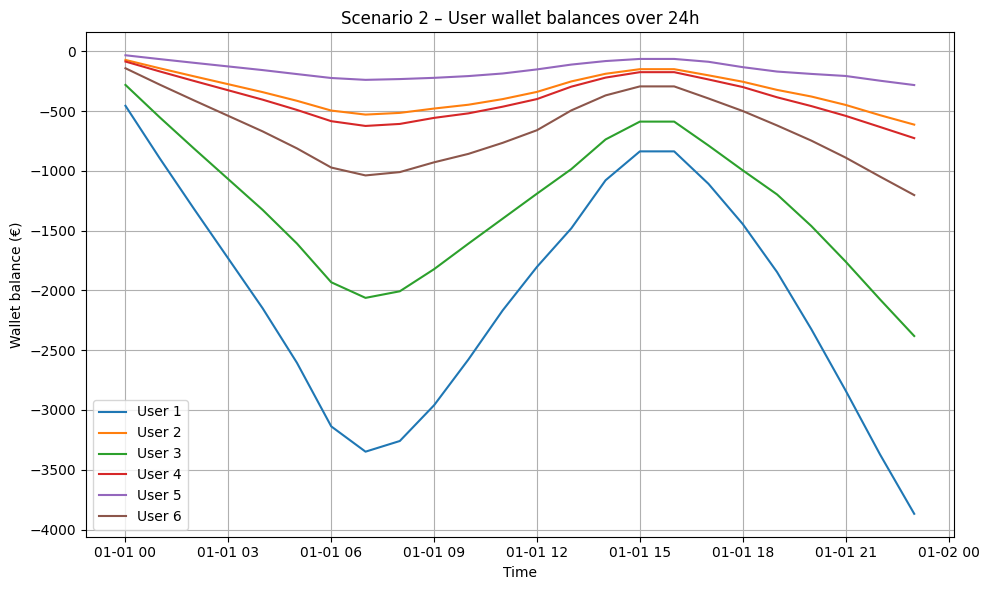

In [26]:
import matplotlib.pyplot as plt

# wallets: index = snapshots, columns = ["User 1", ..., "User 6"]

plt.figure(figsize=(10, 6))

for user in wallets.columns:
    plt.plot(wallets.index, wallets[user], label=user)

plt.xlabel("Time")
plt.ylabel("Wallet balance (€)")
plt.title("Scenario 2 – User wallet balances over 24h")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


***Scenario 1 and 2 Wallet Comparison***

In [27]:
import pandas as pd

############################################
# Common data: prosumer mapping
############################################

prosumer_buses = {
    4: "User 1",
    5: "User 2",
    9: "User 3",
    10: "User 4",
    11: "User 5",
    14: "User 6",
}

def make_bus_index_map(n):
    return {
        (int(b.split()[0]) if isinstance(b, str) else int(b)): b
        for b in n.buses.index
    }

############################################
# Helper: compute wallets for a given scenario
############################################

def compute_wallets_for_scenario(n, scenario_name):
    """
    For a solved PyPSA network n, compute:
    - net injection per user (MW)
    - wallet (cumulative €) per user
    Assumes:
      - snapshots are hourly
      - marginal prices in n.buses_t.marginal_price
      - loads_t.p_set, generators_t.p, storage_units_t.p populated
    """
    dt_hours = 1.0
    prices = n.buses_t.marginal_price  # €/MWh

    bus_index_map = make_bus_index_map(n)

    cash_flows = pd.DataFrame(index=n.snapshots)   # €/h
    wallets    = pd.DataFrame(index=n.snapshots)   # €

    final_balances = {}

    for bus_num, user_label in prosumer_buses.items():
        bus_name = bus_index_map[bus_num]

        gens_at_bus = n.generators.index[n.generators["bus"] == bus_name]
        loads_at_bus = n.loads.index[n.loads["bus"] == bus_name]
        stor_at_bus = n.storage_units.index[n.storage_units["bus"] == bus_name] \
                      if not n.storage_units.empty else []

        p_gen = n.generators_t.p[gens_at_bus].sum(axis=1) if len(gens_at_bus) > 0 else 0.0
        p_load = n.loads_t.p_set[loads_at_bus].sum(axis=1) if len(loads_at_bus) > 0 else 0.0
        p_stor = n.storage_units_t.p[stor_at_bus].sum(axis=1) if len(stor_at_bus) > 0 else 0.0

        # net injection (>0 = export, <0 = import)
        net_injection = p_gen + p_stor - p_load

        # nodal price at this bus
        user_price = prices[bus_name]

        # hourly cash flow and wallet
        cash_flow = user_price * net_injection * dt_hours
        wallet = cash_flow.cumsum()

        cash_flows[user_label] = cash_flow
        wallets[user_label] = wallet
        final_balances[user_label] = wallet.iloc[-1]

    final_balances = pd.Series(final_balances, name=f"{scenario_name} final balance (€)")

    return cash_flows, wallets, final_balances

############################################
# Compute for Scenario 1 and Scenario 2
############################################

# (Re-)solve if needed:
# status1, cond1 = n_s1.optimize(solver_name="highs", log_to_console=False)
# status2, cond2 = n_s2.optimize(solver_name="highs", log_to_console=False)

cf_s1, wallets_s1, final_s1 = compute_wallets_for_scenario(n_s1, "Scenario 1")
cf_s2, wallets_s2, final_s2 = compute_wallets_for_scenario(n_s2, "Scenario 2")

############################################
# Summary comparison table
############################################

summary = pd.concat([final_s1, final_s2], axis=1)
summary["Difference S2 - S1 (€)"] = summary["Scenario 2 final balance (€)"] - summary["Scenario 1 final balance (€)"]

print("=== Final 24h wallet balances: Scenario 1 vs Scenario 2 ===")
print(summary)


=== Final 24h wallet balances: Scenario 1 vs Scenario 2 ===
        Scenario 1 final balance (€)  Scenario 2 final balance (€)  \
User 1                 -15097.026464                  -3868.169047   
User 2                  -2090.328698                   -613.528744   
User 3                  -9343.121234                  -2381.462067   
User 4                  -2770.469531                   -726.547732   
User 5                   -833.364697                   -282.546301   
User 6                  -4604.648180                  -1202.840142   

        Difference S2 - S1 (€)  
User 1            11228.857417  
User 2             1476.799954  
User 3             6961.659167  
User 4             2043.921798  
User 5              550.818396  
User 6             3401.808038  


***Simple P2P settlement layer for Scenario 2***

In [28]:
import numpy as np
import pandas as pd

############################################
# 1. Build net injection and price table for Scenario 2
############################################

bus_index_map_s2 = make_bus_index_map(n_s2)
prices_s2 = n_s2.buses_t.marginal_price  # €/MWh

users = list(prosumer_buses.values())
net_s2 = pd.DataFrame(index=n_s2.snapshots, columns=users, dtype=float)
price_users_s2 = pd.DataFrame(index=n_s2.snapshots, columns=users, dtype=float)

for bus_num, user_label in prosumer_buses.items():
    bus_name = bus_index_map_s2[bus_num]

    gens_at_bus = n_s2.generators.index[n_s2.generators["bus"] == bus_name]
    loads_at_bus = n_s2.loads.index[n_s2.loads["bus"] == bus_name]
    stor_at_bus = n_s2.storage_units.index[n_s2.storage_units["bus"] == bus_name] \
                  if not n_s2.storage_units.empty else []

    p_gen = n_s2.generators_t.p[gens_at_bus].sum(axis=1) if len(gens_at_bus) > 0 else 0.0
    p_load = n_s2.loads_t.p_set[loads_at_bus].sum(axis=1) if len(loads_at_bus) > 0 else 0.0
    p_stor = n_s2.storage_units_t.p[stor_at_bus].sum(axis=1) if len(stor_at_bus) > 0 else 0.0

    net_s2[user_label] = p_gen + p_stor - p_load     # MW
    price_users_s2[user_label] = prices_s2[bus_name] # €/MWh

############################################
# 2. P2P + grid settlement
############################################

dt_hours = 1.0

p2p_cash = pd.DataFrame(0.0, index=n_s2.snapshots, columns=users)
grid_cash = pd.DataFrame(0.0, index=n_s2.snapshots, columns=users)
total_cash = pd.DataFrame(0.0, index=n_s2.snapshots, columns=users)

for t in n_s2.snapshots:
    net_t = net_s2.loc[t]          # MW per user
    price_t = price_users_s2.loc[t]# €/MWh per user

    exporters = net_t[net_t > 0]
    importers = net_t[net_t < 0]

    S_plus = exporters.sum()          # total surplus (MW)
    S_minus = -importers.sum()        # total deficit (MW)

    if S_plus <= 1e-9 or S_minus <= 1e-9:
        # No P2P trade possible this hour; everything goes via grid
        grid_cash.loc[t] = price_t * net_t * dt_hours
        total_cash.loc[t] = grid_cash.loc[t]
        continue

    V_p2p = min(S_plus, S_minus)      # MW (since dt=1h, MWh equal)

    # P2P clearing price: average prosumer nodal price
    lambda_p2p = price_t.mean()

    # Pro-rata allocation of P2P export/import
    p2p_export = exporters / S_plus * V_p2p      # MW for exporting users
    p2p_import = -importers / S_minus * V_p2p    # MW for importing users

    net_p2p = pd.Series(0.0, index=users)        # MW
    net_p2p[p2p_export.index] += p2p_export
    net_p2p[p2p_import.index] -= p2p_import      # minus because import is negative net_p2p

    # Grid volume = net injection - P2P volume
    grid_volume = net_t - net_p2p               # MW

    # Cashflows
    p2p_cash.loc[t] = lambda_p2p * net_p2p * dt_hours
    grid_cash.loc[t] = price_t * grid_volume * dt_hours
    total_cash.loc[t] = p2p_cash.loc[t] + grid_cash.loc[t]

############################################
# 3. Wallets: cumulative sums of cash flows
############################################

p2p_wallet = p2p_cash.cumsum()
grid_wallet = grid_cash.cumsum()
total_wallet = total_cash.cumsum()

############################################
# 4. Final balances summary (Scenario 2 with P2P)
############################################

final_p2p = p2p_wallet.iloc[-1]
final_grid = grid_wallet.iloc[-1]
final_total = total_wallet.iloc[-1]

summary_p2p = pd.DataFrame({
    "Grid-only wallet (Scenario 2, €)": final_s2,     # from earlier central-market calc
    "Grid wallet with P2P split (€, external)": final_grid,
    "P2P wallet (€, internal)": final_p2p,
    "Total wallet with P2P (€, grid+P2P)": final_total,
})

print("=== Scenario 2 – P2P settlement summary ===")
print(summary_p2p)


=== Scenario 2 – P2P settlement summary ===
        Grid-only wallet (Scenario 2, €)  \
User 1                      -3868.169047   
User 2                       -613.528744   
User 3                      -2381.462067   
User 4                       -726.547732   
User 5                       -282.546301   
User 6                      -1202.840142   

        Grid wallet with P2P split (€, external)  P2P wallet (€, internal)  \
User 1                              -3868.169047                       0.0   
User 2                               -613.528744                       0.0   
User 3                              -2381.462067                       0.0   
User 4                               -726.547732                       0.0   
User 5                               -282.546301                       0.0   
User 6                              -1202.840142                       0.0   

        Total wallet with P2P (€, grid+P2P)  
User 1                         -3868.169047  
User 2  

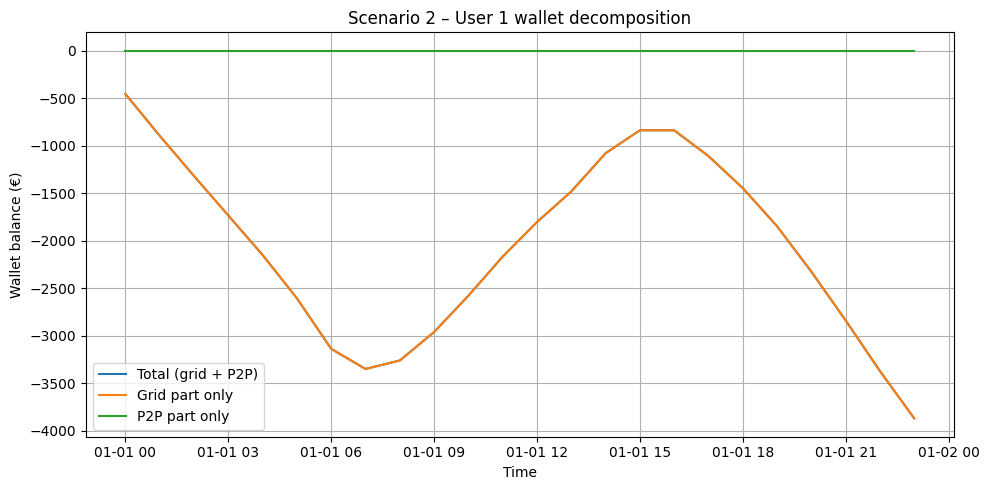

In [29]:
import matplotlib.pyplot as plt

user = "User 1"

plt.figure(figsize=(10,5))
plt.plot(total_wallet.index, total_wallet[user], label="Total (grid + P2P)")
plt.plot(grid_wallet.index, grid_wallet[user], label="Grid part only")
plt.plot(p2p_wallet.index, p2p_wallet[user], label="P2P part only")
plt.xlabel("Time")
plt.ylabel("Wallet balance (€)")
plt.title(f"Scenario 2 – {user} wallet decomposition")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [30]:
export_counts = (net_s2 > 0).sum()
print("Number of hours each user exported (net_injection > 0):")
print(export_counts)


Number of hours each user exported (net_injection > 0):
User 1    8
User 2    8
User 3    8
User 4    8
User 5    8
User 6    8
dtype: int64


***User Wallet Balance on Each Snapshot***

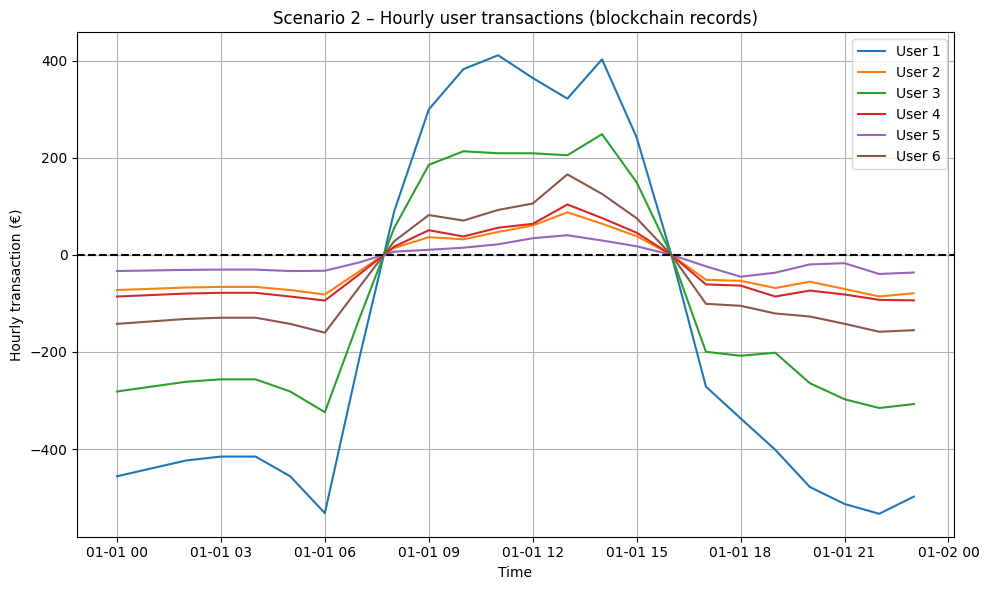

In [32]:
plt.figure(figsize=(10,6))
for user in cash_flows.columns:
    plt.plot(cash_flows.index, cash_flows[user], label=user)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Time")
plt.ylabel("Hourly transaction (€)")
plt.title("Scenario 2 – Hourly user transactions (blockchain records)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


***Generate simple block table***

In [33]:
import pandas as pd
import numpy as np

# Prosumer buses (same as before)
prosumer_buses = {
    4: "User 1",
    5: "User 2",
    9: "User 3",
    10: "User 4",
    11: "User 5",
    14: "User 6",
}

def make_bus_index_map(n):
    return {
        (int(b.split()[0]) if isinstance(b, str) else int(b)): b
        for b in n.buses.index
    }

bus_index_map_s2 = make_bus_index_map(n_s2)
prices_s2 = n_s2.buses_t.marginal_price  # €/MWh
dt_hours = 1.0                            # 1 hour per snapshot

# 1) Compute net injection (MW) and user prices for Scenario 2
users = list(prosumer_buses.values())
net_s2 = pd.DataFrame(index=n_s2.snapshots, columns=users, dtype=float)
price_users_s2 = pd.DataFrame(index=n_s2.snapshots, columns=users, dtype=float)
bus_name_for_user = {}

for bus_num, user_label in prosumer_buses.items():
    bus_name = bus_index_map_s2[bus_num]
    bus_name_for_user[user_label] = bus_name

    gens_at_bus = n_s2.generators.index[n_s2.generators["bus"] == bus_name]
    loads_at_bus = n_s2.loads.index[n_s2.loads["bus"] == bus_name]
    stor_at_bus = n_s2.storage_units.index[n_s2.storage_units["bus"] == bus_name] \
                  if not n_s2.storage_units.empty else []

    p_gen = n_s2.generators_t.p[gens_at_bus].sum(axis=1) if len(gens_at_bus) > 0 else 0.0
    p_load = n_s2.loads_t.p_set[loads_at_bus].sum(axis=1) if len(loads_at_bus) > 0 else 0.0
    p_stor = n_s2.storage_units_t.p[stor_at_bus].sum(axis=1) if len(stor_at_bus) > 0 else 0.0

    net_s2[user_label] = p_gen + p_stor - p_load       # MW
    price_users_s2[user_label] = prices_s2[bus_name]   # €/MWh

# 2) Build the block/transaction table (grid-only)
records = []
block_id = 0

for t in n_s2.snapshots:
    for user in users:
        net = net_s2.loc[t, user]           # MW
        price = price_users_s2.loc[t, user] # €/MWh

        if abs(net) < 1e-9:
            continue  # no trade this hour for this user

        # Energy in MWh for this interval (dt=1h)
        energy_mwh = abs(net) * dt_hours
        value_eur = energy_mwh * price

        # Import: user buys from grid
        if net < 0:
            from_party = user
            to_party = "GridPool"
        # Export: user sells to grid
        else:
            from_party = "GridPool"
            to_party = user

        bus_name = bus_name_for_user[user]

        records.append({
            "block_id": block_id,
            "timestamp": t,
            "tx_type": "GRID",
            "from_party": from_party,
            "to_party": to_party,
            "bus": bus_name,
            "energy_mwh": energy_mwh,
            "price_eur_per_mwh": price,
            "value_eur": value_eur,
        })
        block_id += 1

block_table = pd.DataFrame.from_records(records)

print("=== Example of grid-only block table (first 20 rows) ===")
print(block_table.head(20))


=== Example of grid-only block table (first 20 rows) ===
    block_id           timestamp tx_type from_party  to_party bus  energy_mwh  \
0          0 2025-01-01 00:00:00    GRID     User 1  GridPool   4      33.460   
1          1 2025-01-01 00:00:00    GRID     User 2  GridPool   5       5.320   
2          2 2025-01-01 00:00:00    GRID     User 3  GridPool   9      20.650   
3          3 2025-01-01 00:00:00    GRID     User 4  GridPool  10       6.300   
4          4 2025-01-01 00:00:00    GRID     User 5  GridPool  11       2.450   
5          5 2025-01-01 00:00:00    GRID     User 6  GridPool  14      10.430   
6          6 2025-01-01 01:00:00    GRID     User 1  GridPool   4      32.504   
7          7 2025-01-01 01:00:00    GRID     User 2  GridPool   5       5.168   
8          8 2025-01-01 01:00:00    GRID     User 3  GridPool   9      20.060   
9          9 2025-01-01 01:00:00    GRID     User 4  GridPool  10       6.120   
10        10 2025-01-01 01:00:00    GRID     User 5 

In [34]:
# Reconstruct wallet from the block_table
wallet_from_blocks = {}

for user in users:
    # outgoing payments (user as from_party)
    outgoing = block_table.loc[block_table["from_party"] == user, "value_eur"].sum()
    # incoming (user as to_party)
    incoming = block_table.loc[block_table["to_party"] == user, "value_eur"].sum()
    wallet_from_blocks[user] = incoming - outgoing

wallet_from_blocks = pd.Series(wallet_from_blocks, name="Reconstructed wallet (€)")
print("\n=== Wallet reconstructed from block table ===")
print(wallet_from_blocks)



=== Wallet reconstructed from block table ===
User 1   -3868.169047
User 2    -613.528744
User 3   -2381.462067
User 4    -726.547732
User 5    -282.546301
User 6   -1202.840142
Name: Reconstructed wallet (€), dtype: float64


***Unit Commitment***

In [36]:
# Example: approximate commitment from dispatch in Scenario 2
eps = 1e-3  # small threshold

commit_approx = (n_s2.generators_t.p > eps).astype(int)  # 1 = on, 0 = off

print(commit_approx.head(600))


name                 G0  G1  G2  G3  G4  User 1 PV  User 2 PV  User 3 PV  \
snapshot                                                                   
2025-01-01 00:00:00   1   0   0   0   0          0          0          0   
2025-01-01 01:00:00   1   0   0   0   0          0          0          0   
2025-01-01 02:00:00   1   0   0   0   0          0          0          0   
2025-01-01 03:00:00   1   0   0   0   0          0          0          0   
2025-01-01 04:00:00   1   0   0   0   0          0          0          0   
2025-01-01 05:00:00   1   0   0   0   0          0          0          0   
2025-01-01 06:00:00   1   0   0   0   0          0          0          0   
2025-01-01 07:00:00   1   0   0   0   0          1          1          1   
2025-01-01 08:00:00   1   0   0   0   0          1          1          1   
2025-01-01 09:00:00   1   0   0   0   0          1          1          1   
2025-01-01 10:00:00   1   0   0   0   0          1          1          1   
2025-01-01 1